# <center>Vector và Hệ phương trình tuyến tính trong Python</center>

## Mục lục

* [Python và các thư viện tính toán khoa học](#c2)
* [Vector trong Python](#c3)
* [Ma trận (cơ bản) trong Python](#c4)
* [Hệ phương trình tuyến tính và Phép khử Gauss trong Python](#c5)
* [Không gian con, cơ sở và số chiều](#c6)
* [Trực giao hóa với thuật giải Gram-Schmidt](#c7)
* [Bài tập](#c8)

## Python và các thư viện tính toán khoa học <a class="anchor" id="c2"></a>

[Python](https://www.python.org/) là ngôn ngữ lập trình được dùng phổ biến cho tính toán khoa học (và nhiều mục đích khác). Tài liệu tra cứu chính thống của Python được để ở [Python documentation](https://docs.python.org/3/index.html). Có thể dùng hướng dẫn [The Python Tutorial](https://docs.python.org/3/tutorial/) để học nhanh Python. Có thể dùng sách [Bí kíp luyện Lập trình nhập môn với Python (hBook)](https://github.com/vqhBook/python) để học kĩ Python căn bản. Ngoài ra, có thể dùng một số nguồn tham khảo khác như [Python3 Tutorial](https://www.python-course.eu/python3_course.php), [Numerical Programming with Python](https://www.python-course.eu/numerical_programming_with_python.php), [GeeksforGeeks](https://www.geeksforgeeks.org/python-programming-language/)...

Các thư viện Python phổ biến dùng trong tính toán khoa học là: [NumPy](https://numpy.org/), [SciPy](https://www.scipy.org/), [SymPy](https://www.sympy.org/en/index.html), [pandas](https://pandas.pydata.org/), [scikit-learn](https://scikit-learn.org/stable/), [Matplotlib](https://matplotlib.org/)... Các thư viện này sẽ được giới thiệu, hướng dẫn và dùng trong các buổi Lab, đồ án.

NumPy và SciPy là các thư viện **tính toán số** (numeric computation) giúp tính xấp xỉ nhưng hiệu quả với khối lượng tính toán lớn. Có thể học nhanh NumPy tại [NumPy - the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html).

SymPy là thư viện **tính toán ký hiệu** (symbolic computation) giúp tính chính xác và hình thức với khối lượng tính toán nhỏ. Có thể học nhanh SymPy tại [SymPy Introduction](https://docs.sympy.org/latest/tutorial/intro.html) và [SymPy Matrices](https://docs.sympy.org/latest/tutorial/matrices.html).

Tra cứu các hỗ trợ cho **đại số tuyến tính** (linear algebra) tại:

* [Linear algebra (numpy.linalg)](https://numpy.org/doc/stable/reference/routines.linalg.html#)

* [Linear algebra (scipy.linalg)](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)

* [SymPy Matrices (linear algebra)](https://docs.sympy.org/latest/modules/matrices/matrices.html)

Một số thư viện có dùng trong bài lab này:

* Module [`math`](https://docs.python.org/3/library/math.html) trong thư viện chuẩn Python hỗ trợ các hàm Toán thông dụng.

* Lớp [`fractions.Fraction`](https://docs.python.org/3/library/fractions.html) trong thư viện chuẩn Python hỗ trợ kiểu phân số dùng để tính toán chính xác.

* Các thư viện `numpy`, `scipy`, `sympy`.

* Ngoài ra, hàm `to_fraction` giúp tạo phân số (từ chuỗi, số nguyên, danh sách các số...) khi muốn tính toán chính xác và hàm `myprint` giúp "xuất đẹp" các danh sách (vector, tập vector, ma trận).

In [3]:
import math
from fractions import Fraction
import numpy as np
import scipy.linalg
import sympy
from sympy import Matrix

sympy.init_printing()

x = ["1/2", "2/3"]
def to_fraction(x):
    if isinstance(x, list):
        return [to_fraction(e) for e in x] # list comprehension 
    else:
        return Fraction(x) # "1/2" --> 1/2
    

    # # Another way to implement this function, without using list comprehension.
    # #     It is a little bit longer!!!
    # if not isinstance(x, list):
    #     return Fraction(x)
    
    # res = []
    # n = len(x)
    # for i in range(n): # for (i = 0; i < n; i++)
    #     res.append(to_fraction(x[i]))
        
    # return res
    

def myprint(x, sep=" "):
    if isinstance(x, list) and x:
        if isinstance(x[0], list): # list of list
            m, n = len(x), len(x[0])
            widths = [max(len(str(ai[j])) for ai in x) for j in range(n)]
            rows = [sep.join(format(str(ai[j]), f">{widths[j]}") for j in range(n)) for ai in x]
            print("[" + "\n".join((" [" if i > 0 else "[") + rows[i] + "]" for i in range(m)) + "]")
        else: # list
            print("[" + sep.join(str(e) for e in x) + "]")
    else:
        print(x)

## Vector trong Python <a class="anchor" id="c3"></a>

Một bộ gồm $n$ số thực (n-tuple) $\boldsymbol{v} = (v_1, v_2, ..., v_n) \in \mathbb{R}^n$ được gọi là một **vector** kích thước $n$. Các số $v_1, v_2, ..., v_n \in \mathbb{R}$ được gọi là các **phần tử** (element, entry) của vector. Để phân biệt với vector, các số thực còn được gọi là **vô hướng** (scalar).

Cách đơn giản nhất để biểu diễn vector là dùng **danh sách** (list) các số. Cách hiệu quả và tiện lợi hơn là dùng **NumPy 1D array**.

### Khai báo

In [4]:
# Init
v_list = [1, 2, 3, 4, 5]            # Uses list 
v_numpy = np.array([1, 2, 3, 4, 5]) # Uses NumPy

# Display the values
print('Use list: ', v_list)
print('Use NumPy: ', v_numpy)

# Access elements (basic)
print('The first element in vector (list): ', v_list[0])
print('The last element in vector (NumPy): ', v_numpy[-1])

print('Subvector (1st -> 3rd) in vector (list): ', v_list[:3])          # Other ways?
print('Subvector (3 last elements) in vector (NumPy): ', v_numpy[-3:])  # Other ways?

Use list:  [1, 2, 3, 4, 5]
Use NumPy:  [1 2 3 4 5]
The first element in vector (list):  1
The last element in vector (NumPy):  5
Subvector (1st -> 3rd) in vector (list):  [1, 2, 3]
Subvector (3 last elements) in vector (NumPy):  [3 4 5]


Tùy trường hợp, vector $\boldsymbol{v} = (v_1, v_2, ..., v_n) \in \mathbb{R}^n$ có thể được biểu diễn như là **vector dòng** (row vector) hay **vector cột** (column vector)
$$
\boldsymbol{v} = 
\begin{bmatrix}
v_1 & v_2 & \cdots & v_n
\end{bmatrix} \in \mathbb{R}^{1 \times n},
$$
$$
\boldsymbol{v} = 
\begin{bmatrix}
v_1 \\ v_2 \\ \vdots \\ v_n
\end{bmatrix} \in \mathbb{R}^{n \times 1}.
$$

In [5]:
v_numpy.shape

In [6]:
# Uses NumPy
v_row = v_numpy.reshape(1, len(v_numpy))
v_col = v_numpy.reshape(len(v_numpy), 1)

print('Row vector: \n', v_row, '\nShape: ', v_row.shape)
print('\nColumn vector: \n', v_col, '\nShape: ', v_col.shape)

Row vector: 
 [[1 2 3 4 5]] 
Shape:  (1, 5)

Column vector: 
 [[1]
 [2]
 [3]
 [4]
 [5]] 
Shape:  (5, 1)


In [7]:
# Uses SymPy
Matrix([1, 2, 3, 4, 5]) # SymPy treats a vector as a column vector, which is a matrix with only 1 column

### Vector không (zero vector)

Vector $\boldsymbol{0} = (0, 0, ..., 0) \in \mathbb{R}^n$ được gọi là **vector không** (zero vector).

2 vector $\boldsymbol{v} = (v_1, v_2, ..., v_n), \boldsymbol{w} = (w_1, w_2, ..., w_n) \in \mathbb{R}^n$ được gọi là **bằng nhau** (equal), kí hiệu $\boldsymbol{v} = \boldsymbol{w}$ nếu $v_i = w_i, \forall i$.

#### Sử dụng list

In [8]:
# Define functions
def is_zero(x):
    # Check if a real number x is equal to 0 (or is very close to 0)
    return math.isclose(x, 0, abs_tol=1e-09)
    # |a - b| <= 0.00000000001 --> a ~ b

def create_zero_vector(n):
    return [0 for _ in range(n)] #for _ in [0..n-1]
    # [0, 0, 0]

def is_zero_vector(v):
    return all(is_zero(vi) for vi in v)
            # any(is_zero(vi) for vi in v) để check xem có phần tử nào bằng 0 không

In [9]:
v = create_zero_vector(3)

# Display value
print(v)

# Check if v is a zero vector
print('Is zero vector: ', is_zero_vector(v))

[0, 0, 0]
Is zero vector:  True


##### TODO: Tìm hiểu thêm

In [10]:
# What is the output when we call: v == 0?      có trường hợp sai số
# What is the output when we call: v == create_zero_vector(3)?
# Give explanations

#### Sử dụng NumPy

In [11]:
v = np.zeros(3)

# Display value
print(v)

# Check if v is a zero vector
print('Is zero vector (using built-in function), ', all(v == 0))                # What is the meaning of all(v == 0)?   
# TODO: element wise, broadcasting (khó)
print('Is zero vector (using our implemented function): ', is_zero_vector(v))

[0. 0. 0.]
Is zero vector (using built-in function),  True
Is zero vector (using our implemented function):  True


### Các phép toán trong Vector

Cho 2 vector $\boldsymbol{v} = (v_1, v_2, ..., v_n), \boldsymbol{w} = (w_1, w_2, ..., w_n) \in \mathbb{R}^n$ và số thực $\alpha \in \mathbb{R}$, ta định nghĩa các phép toán
$$
\boldsymbol{v} + \boldsymbol{w} = (v_1 + w_1, v_2 + w_2, ..., v_n + w_n),
$$
$$
\boldsymbol{v} - \boldsymbol{w} = (v_1 - w_1, v_2 - w_2, ..., v_n - w_n),
$$
$$
\alpha \boldsymbol{v} = (\alpha v_1, \alpha v_2, ..., \alpha v_n).
$$

Cho tập các vector $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k \in \mathbb{R}^n$ và các số $\alpha_1, \alpha_2, ..., \alpha_k \in \mathbb{R}$, ta nói vector
$$
\boldsymbol{w} = \alpha_1 \boldsymbol{v}_1 + \alpha_2 \boldsymbol{v}_2 + ... + \alpha_k \boldsymbol{v}_k
$$

là một **tổ hợp tuyến tính** (linear combination) của $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k$ với các **hệ số** (coefficient) $\alpha_1, \alpha_2, ..., \alpha_k$.

#### Sử dụng List

In [12]:
# Define functions
def add_vector(v, w):
    return [vi + wi for vi, wi in zip(v, w)]

def sub_vector(v, w):
    return [vi - wi for vi, wi in zip(v, w)]

def mul_scalar_vector(alpha, v):
    return [alpha*vi for vi in v]

def equal_vector(v, w):
    return is_zero_vector(sub_vector(v, w)) # 2 vectors are equal if their difference is the zero vector

# TODO: Hàm zip dùng để ghép cặp các phần tử trong 2 list

In [13]:
v = [1, -3, 2]
w = [4, 2, 1]

print('Tổng 2 vector: ', add_vector(v, w))
print('Hiệu 2 vector: ', sub_vector(v, w))
print('Vector v nhân 2: ', mul_scalar_vector(2, v))
print('So sánh vector (v - w) == (v + (-1w)): ', equal_vector(sub_vector(v, w), add_vector(v, mul_scalar_vector(-1, w))))

Tổng 2 vector:  [5, -1, 3]
Hiệu 2 vector:  [-3, -5, 1]
Vector v nhân 2:  [2, -6, 4]
So sánh vector (v - w) == (v + (-1w)):  True


#### Sử dụng NumPy

In [14]:
v = np.array(v)
w = np.array(w)

print('Tổng 2 vector: ', v + w)
print('Hiệu 2 vector: ', v - w)
print('Vector v nhân 2: ', 2 * v)
print('So sánh vector: ', all((v - w) == (v + (-1*w))))

Tổng 2 vector:  [ 5 -1  3]
Hiệu 2 vector:  [-3 -5  1]
Vector v nhân 2:  [ 2 -6  4]
So sánh vector:  True


#### Sử dụng SymPy

In [15]:
v = Matrix(v)
w = Matrix(w)

print('Tổng 2 vector: \n', v + w)
print('Hiệu 2 vector: \n', v - w)
print('Vector v nhân 2: \n', 2*v)
print('So sánh vector: ', v - w == v + (-1*w)) # Unlike NumPy, SymPy uses "==" operator to compare 2 vectors (matrice)

Tổng 2 vector: 
 Matrix([[5], [-1], [3]])
Hiệu 2 vector: 
 Matrix([[-3], [-5], [1]])
Vector v nhân 2: 
 Matrix([[2], [-6], [4]])
So sánh vector:  True


Tổ hợp tuyến tính:


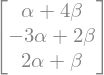

In [16]:
print('Tổ hợp tuyến tính:')
sympy.symbols("alpha")*v + sympy.symbols("beta")*w

### Tích vô hướng

Cho 2 vector $\boldsymbol{v} = (v_1, v_2, ..., v_n), \boldsymbol{w} = (w_1, w_2, ..., w_n) \in \mathbb{R}^n$:

Ta định nghĩa **tích vô hướng** (inner product, dot product) của $\boldsymbol{v}, \boldsymbol{w}$ là
$$
\langle \boldsymbol{v}, \boldsymbol{w} \rangle = v_1w_1 + v_2w_2 + ... + v_n w_n = \sum_{i=1}^n v_i w_i,
$$

In [17]:
def calc_inner_product(v, w):
    return sum(vi*wi for vi, wi in zip(v, w)) # What is zip function?
# Gom các phần tử của 2 vector v và w thành các cặp (vi, wi) tương ứng

In [18]:
v = [1, 2, 3]
w = [4, 5, 2]

print('Tích vô hướng: ', calc_inner_product(v, w))

Tích vô hướng:  20


### Trực giao

Ta nói $\boldsymbol{v}, \boldsymbol{w}$ **trực giao** (orthogonal, perpendicular), kí hiệu $\boldsymbol{v} \bot \boldsymbol{w}$, nếu $\langle \boldsymbol{v}, \boldsymbol{w} \rangle = 0$,

In [19]:
def is_orthogonal(v, w):
    return is_zero(calc_inner_product(v, w))

In [20]:
v = [1, -2, 3]
w = [4, 5, 2]

print('Trực giao: ', is_orthogonal(v, w))

Trực giao:  True


### Chuẩn

Ta định nghĩa **chuẩn** (norm, length, magnitude) của $\boldsymbol{v}$ là
$$
\| \boldsymbol{v} \| = \sqrt{\langle \boldsymbol{v}, \boldsymbol{v} \rangle} = \sqrt{v_1^2 + v_2^2 + ... + v_n^2} = \sqrt{\sum_{i=1}^n v_i^2},
$$

In [21]:
def norm_square(v):
    return calc_inner_product(v, v)

def norm(v):
    return sympy.sqrt(norm_square(v)) # Uses SymPy to get sqrt symbol

In [22]:
v = [1, 2, 3]

print('Chuẩn: ')
norm(v)

Chuẩn: 


### Vector đơn vị

Ta nói $\boldsymbol{v}$ là **vector đơn vị** (unit vector) nếu $\| \boldsymbol{v} \| = 1$,

In [23]:
def is_one(v):
    return math.isclose(v, 1)

def is_unit_vector(v):
    return is_one(norm(v))

In [24]:
one = [1, 0, 0]

print('Là vector đơn vị: ', is_unit_vector(one))

Là vector đơn vị:  True


### Khoảng cách

Ta định nghĩa **khoảng cách** (distance) giữa $\boldsymbol{v}$ và $\boldsymbol{w}$ là $\| \boldsymbol{v} - \boldsymbol{w} \|$.

In [25]:
def distance(v, w):
    return norm(sub_vector(v, w))

In [26]:
v = [1, -2, 3]
w = [4, 5, 2]

print('Khoảng cách:')
distance(v, w)

Khoảng cách:


### TODO: Tìm hiểu thêm

Tìm hiểu cách sử dụng NumPy và SymPy cho các khái niệm được liệt kê phía trên (từ Trực giao đến Khoảng cách) 

## Ma trận (cơ bản) trong Python <a class="anchor" id="c4"></a>

*(Ma trận sẽ được hướng dẫn kĩ hơn trong Lab 2.)*

### Khái niệm

Một bảng chữ nhật gồm $m$ dòng, $n$ cột các số thực 
$$
A =
\begin{bmatrix}
  a_{11} & a_{12} & \cdots & a_{1n} \\
  a_{21} & a_{22} & \cdots & a_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{bmatrix} \in \mathbb{R}^{m \times n}
$$
được gọi là **ma trận** (matrix) có kích thước (hay có dạng) $m \times n$. Số $a_{ij}$ được gọi là **phần tử** (element, entry) ở dòng $i$, cột $j$ của ma trận $A$.

Ma trận $A \in \mathbb{R}^{m \times n}$ có thể xem như gồm $m$ vector dòng $\mathbb{R}^{1 \times n}$ với dòng $i$ là
$$
\boldsymbol{a}_{i,} = 
\begin{bmatrix}
  a_{i1} & a_{i2} & \cdots & a_{in} \\
\end{bmatrix},
$$
hay gồm $n$ vector cột $\mathbb{R}^{m \times 1}$ với cột $j$ là
$$
\boldsymbol{a}_{,j} = 
\begin{bmatrix}
  a_{1j} \\ a_{2j} \\ \vdots \\ a_{mj} 
\end{bmatrix}.
$$

Ta nói ma trận có được từ $A$ bằng cách xếp các dòng thành các cột là ma trận **chuyển vị** (transpose) của $A$, kí hiệu $A^T$, tức là
$$
A^T = 
\begin{bmatrix}
  a_{11} & a_{21} & \cdots & a_{m1} \\
  a_{12} & a_{22} & \cdots & a_{m2} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{1n} & a_{2n} & \cdots & a_{mn} 
\end{bmatrix} \in \mathbb{R}^{n \times m}.
$$

**Cách đơn giản nhất để biểu diễn ma trận là dùng danh sách lồng** (nested list) các số. Cách hiệu quả và tiện lợi hơn là dùng **NumPy 2D array**.

### Chuyển vị

#### List

In [27]:
def transpose(A):
    m, n = len(A), len(A[0]) # The size of matrix
    return [[A[i][j] for i in range(m)] for j in range(n)]
# [A[i][j] for i in range(m)] lấy cột

A = [[1, 2, 3], 
     [4, 5, 6]]

print('Trước khi chuyển vị')
myprint(A)

print('\nSau khi chuyển vị')
myprint(transpose(A))

Trước khi chuyển vị
[[1 2 3]
 [4 5 6]]

Sau khi chuyển vị
[[1 4]
 [2 5]
 [3 6]]


#### NumPy

In [28]:
A = np.array(A)

print('Trước khi chuyển vị')
print(A)

print('\nSau khi chuyển vị')
print(A.T)

Trước khi chuyển vị
[[1 2 3]
 [4 5 6]]

Sau khi chuyển vị
[[1 4]
 [2 5]
 [3 6]]


In [29]:
A[:,1]

array([2, 5])

#### SymPy

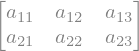

In [30]:
A = Matrix([[sympy.symbols(f"a_{i}{j}") for j in range(1, 4)] for i in range(1, 3)])
A

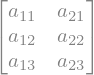

In [31]:
A.T

### Nhân ma trận với vector

Cho ma trận $A \in \mathbb{R}^{m \times n}$ và vector cột $\boldsymbol{v} \in \mathbb{R}^{n \times 1}$, phép nhân
$$
A\boldsymbol{v} = 
\begin{bmatrix}
  a_{11} & a_{12} & \cdots & a_{1n} \\
  a_{21} & a_{22} & \cdots & a_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{bmatrix}
\begin{bmatrix}
  v_1 \\ v_2 \\ \vdots \\ v_n 
\end{bmatrix} =
\begin{bmatrix}
  a_{11}v_1 + a_{12}v_2 + ... + a_{1n}v_n \\ 
  a_{21}v_1 + a_{22}v_2 + ... + a_{2n}v_n \\ \vdots \\ 
  a_{m1}v_1 + a_{m2}v_2 + ... + a_{mn}v_n \\ 
\end{bmatrix}
$$
có thể được định nghĩa như là tích vô hướng các vector dòng của $A$ với $\boldsymbol{v}$  (Recommended)
$$
A\boldsymbol{v} = 
\begin{bmatrix}
  \langle \boldsymbol{a}_{1,}, \boldsymbol{v} \rangle \\ 
  \langle \boldsymbol{a}_{2,}, \boldsymbol{v} \rangle \\ \vdots \\ 
  \langle \boldsymbol{a}_{m,}, \boldsymbol{v} \rangle 
\end{bmatrix},
$$
hay có thể được định nghĩa như là tổ hợp tuyến tính các vector cột của $A$ với các hệ số trong $\boldsymbol{v}$
$$
A\boldsymbol{v} =
v_1\begin{bmatrix}
  a_{11} \\ a_{21} \\ \vdots \\ a_{m1} 
\end{bmatrix} + 
v_2\begin{bmatrix}
  a_{12} \\ a_{22} \\ \vdots \\ a_{m2} 
\end{bmatrix} + ... +
v_n\begin{bmatrix}
  a_{1n} \\ a_{2n} \\ \vdots \\ a_{mn} 
\end{bmatrix} =
v_1\boldsymbol{a}_{,1} + v_2\boldsymbol{a}_{,2} + ... + v_n\boldsymbol{a}_{,n}.
$$

#### List

In [32]:
# The inner product of a row vector and a vector v
def mul_matrix_vector(A, v):
    return [calc_inner_product(ai, v) for ai in A]

# The linear combination of a column vector and a vector v
def mul_matrix_vector2(A, v):
    w = [0 for _ in range(len(v))]
    for j in range(len(v)):
        w = add_vector(w, mul_scalar_vector(v[j], [ai[j] for ai in A]))
    return w

In [33]:
A = [[1, 2, 3], [4, 5, 6]]
v = [1, 1, 1]

print('Matrix A: ')
myprint(A)
print('Vector v: ')
myprint(v)

print('Nhân ma trận (góc nhìn tích vô hướng các vector dòng với v)')
print(mul_matrix_vector(A, v))

print('Nhân ma trận (góc nhìn tổ hợp tuyến tính các vector với các hệ số trong v)')
print(mul_matrix_vector2(A, v))

Matrix A: 
[[1 2 3]
 [4 5 6]]
Vector v: 
[1 1 1]
Nhân ma trận (góc nhìn tích vô hướng các vector dòng với v)
[6, 15]
Nhân ma trận (góc nhìn tổ hợp tuyến tính các vector với các hệ số trong v)
[6, 15]


#### NumPy

In [34]:
A = np.array(A)
v = np.array(v)

print('Matrix A: ')
print(A)
print('Vector v: ')
print(v)

print('Av: ', np.matmul(A, v)) # NOTE: NOT A * v vì dấu nhân là nhân element wise (tích vô hướng)

Matrix A: 
[[1 2 3]
 [4 5 6]]
Vector v: 
[1 1 1]
Av:  [ 6 15]


#### SymPy

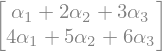

In [35]:
A = Matrix(A)
v = Matrix(sympy.symbols("alpha_1 alpha_2 alpha_3"))

A * v

### Biến đổi sơ cấp trên dòng

3 loại biến đổi sau trên một ma trận được gọi là **phép biến đổi sơ cấp trên dòng** (elementary row operation):

- **Loại 1.** (Row switching) Đổi hai dòng cho nhau,

- **Loại 2.** (Row multiplication) Nhân một dòng với một số khác 0,

- **Loại 3.** (Row addition) Cộng vào một dòng một bội số của dòng khác.


Cho $A, B \in \mathbb{R}^{m \times n}$, ta nói $A, B$ **tương đương dòng** (row equivalent) với nhau nếu $B$ có được từ $A$ (hay ngược lại, $A$ có được từ $B$) qua hữu hạn phép biến đổi sơ cấp trên dòng.


Một ma trận được nói là có **dạng bậc thang theo dòng** (row echelon form) nếu:

- Các dòng khác $\boldsymbol{0}$ luôn nằm trên các dòng $\boldsymbol{0}$ (nếu có),

- Trên 2 dòng khác $\boldsymbol{0}$, hệ số khác 0 đầu tiên của dòng dưới luôn nằm bên phải cột chứa hệ số khác 0 đầu tiên của dòng trên.

#### List

In [36]:
def row_switch(A, i, k):
    "di <-> dk"
    A[i], A[k] = A[k], A[i]
    
def row_mul(A, i, alpha):
    "di = anpha*di"
    A[i] = mul_scalar_vector(alpha, A[i])

def row_add(A, i, k, alpha):
    "di = di + anpha*dk"
    A[i] = add_vector(A[i], mul_scalar_vector(alpha, A[k]))
    
def is_echelon(A): # Check if a matrix is echelon - ma trận bậc thang
    pass # TODO


In [37]:
A = [[1, 2, 3],
     [4, 5, 6]]

print('Ma trận ban đầu')
myprint(A)

print('\nNhân dòng 0 với 4')
row_mul(A, 0, 4)     # d0 = 4d0
myprint(A)

print('\nĐổi chỗ 2 dòng 0 và 1')
row_switch(A, 0, 1)  # d0 <-> d1
myprint(A)

print('\nCập nhật dòng 1 bằng dòng 1 trừ dòng 0')
row_add(A, 1, 0, -1) # d1 = d1 - d0
myprint(A)

Ma trận ban đầu
[[1 2 3]
 [4 5 6]]

Nhân dòng 0 với 4
[[4 8 12]
 [4 5  6]]

Đổi chỗ 2 dòng 0 và 1
[[4 5  6]
 [4 8 12]]

Cập nhật dòng 1 bằng dòng 1 trừ dòng 0
[[4 5 6]
 [0 3 6]]


#### SymPy

In [38]:
A = Matrix(A)

print(A.is_echelon)

True


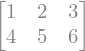

In [39]:
A = A.elementary_row_op("n->n+km", row=1, row2=0, k=1)     # d1 = d1 + d0
A = A.elementary_row_op("n<->m", row1=1, row2=0)           # d1 <-> d0
A = A.elementary_row_op("n->kn", row=0, k=Fraction("1/4")) # d0 = d0/4
# elementary_row_op sơ cấp biến đổi trên dòng
A

## Hệ PTTT và Phép khử Gauss <a class="anchor" id="c5"></a>

### Các khái niệm cơ bản

**Hệ PTTT** (system of linear equations, linear system) gồm $m$ phương trình theo $n$ ẩn số $x_1, x_2, ..., x_n$ là hệ có dạng
$$
\begin{matrix}
  a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1 \\ 
  a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n = b_2 \\ 
  \vdots \\ 
  a_{m1}x_1 + a_{m2}x_2 + ... + a_{mn}x_n = b_m \\ 
\end{matrix}.
$$

Hệ PTTT trên có thể được viết lại dưới dạng ma trận
$$ A\boldsymbol{x} = \boldsymbol{b} $$
với $A \in \mathbb{R}^{m \times n}$ là **ma trận các hệ số** (coefficient matrix)
$$
A =
\begin{bmatrix}
  a_{11} & a_{12} & \cdots & a_{1n} \\
  a_{21} & a_{22} & \cdots & a_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{bmatrix},
$$
$\boldsymbol{x}$ là vector cột các **ẩn** (unknown) và $\boldsymbol{b}$ là vector cột các **hệ số vế phải** (right-hand side)
$$
\boldsymbol{x} =
\begin{bmatrix}
  x_{1} \\ x_{2} \\ \vdots \\ x_{n} 
\end{bmatrix}, 
\boldsymbol{b} =
\begin{bmatrix}
  b_{1} \\ b_{2} \\ \vdots \\ b_{n} 
\end{bmatrix}.
$$

Trường hợp $\boldsymbol{b} = \boldsymbol{0}$, hệ thường được gọi là hệ **thuần nhất** (homogeneous).

Với $A \in \mathbb{R}^{m \times n}, \boldsymbol{b} \in \mathbb{R}^{m \times 1}$ cho trước, ta nói $\boldsymbol{s} \in \mathbb{R}^{m \times 1}$ là vector **nghiệm** (solution) của hệ $A\boldsymbol{x} = \boldsymbol{b}$ nếu $A\boldsymbol{s} = \boldsymbol{b}$.

In [40]:
A = [[1, -1],
     [2, 1]]
b = [1, 6]

x = to_fraction(["7/3", "4/3"])

Ax = mul_matrix_vector(A, x)
myprint(Ax)

print('Ax == b: ', equal_vector(Ax, b))

[1 6]
Ax == b:  True


### Giải hệ PTTT

Hệ PTTT $A\boldsymbol{x} = \boldsymbol{b}$ thường được giải bằng các bước:

> **Bước 1.** Lập **ma trận bổ sung** (augmented matrix) bằng cách ghép cột $\boldsymbol{b}$ sau ma trận $A$: $\bar{A} = \left[ A | \boldsymbol{b} \right]$.

> **Bước 2.** Dùng các phép biến đổi sơ cấp trên dòng để biến đổi $\bar{A}$ thành ma trận tương đương dòng có dạng bậc thang $R$.

> **Bước 3.** Giải $R$ bằng **phép thế ngược** (back-substitution) để có nghiệm.

***Mệnh đề.*** Nếu $\bar{A}, \bar{B}$ tương đương dòng thì các hệ PTTT tương ứng với ma trận bổ sung $\bar{A}, \bar{B}$ có cùng tập nghiệm.

#### Bước 1: Lập ma trận bổ sung

In [41]:
def augmented_matrix(A, b):
    "Tạo ma trận bổ sung [A|b]"
    return [ai + [bi] for ai, bi in zip(A, b)]
# ai + [bi] là cộng thêm phần tử bi vào cuối vector ai, + là append phần tử bi vào list

A_bar = augmented_matrix(A, b)

myprint(A_bar)

[[1 -1 1]
 [2  1 6]]


#### Bước 2: Tạo ma trận bậc thang - Sử dụng phép khử Gauss

**Khử Gauss** (Gaussian elimination) là một cách biến đổi tương đương dòng đưa ma trận về dạng bậc thang. Thuật giải gồm các bước:

> **Bước 1.** Xác định cột trái nhất không chứa toàn số 0.

> **Bước 2.** Đổi chỗ hai dòng, nếu cần thiết, để đưa số hạng khác 0 nào đó ở dưới về đầu cột nhận được ở Bước 1.   
(*Đơn giản nhất, có thể chọn dòng đầu tiên có số hạng khác 0. Phức tạp hơn, chiến lược "partial pivoting" chọn dòng có số hạng có trị tuyệt đối lớn nhất.*)

> **Bước 3.** Với số hạng đầu cột nhận được từ Bước 2 là $a \neq 0$, nhân dòng chứa nó với $\frac{1}{a}$ để có **số dẫn đầu** 1 (leading 1).  
(*Bước này tùy chọn*.)

> **Bước 4.** Cộng một bội số thích hợp của dòng đầu cho từng dòng dưới để biến các số hạng bên dưới số dẫn đầu thành 0.

> **Bước 5.** Che dòng đầu đã làm xong. Lặp lại các bước cho đến khi được ma trận bậc thang.

In [42]:
# vừa lấy giấy làm, vừa đọc thuật toán, vừa code thì hiểu - From cô Uyên nghiêm túc with love
def Gauss_elimination(A, leading1=True):
    R = A.copy()
    m, n = len(R), len(R[0]) # The size of matrix
    
    row = col = 0
    
    while row < m:
        # Step 1
        while col < n and all(is_zero(R[i][col]) for i in range(row, m)):
            col += 1
        if col == n: # it's echelon
            break
        
        # Step 2 (select the first row that contains non-zero coefficient)
        pivot_row = row + [not is_zero(R[i][col]) for i in range(row, m)].index(True)
        row_switch(R, row, pivot_row)
        
        # Step 3 (leading 1 option)
        if leading1:
            row_mul(R, row, 1/R[row][col])
            
        # Step 4
        for i in range(row + 1, m):
            multiplier = R[i][col]/R[row][col]
            row_add(R, i, row, -multiplier) # di = di - drow * multiplier
    
        # Step 5
        row += 1
        
    return R

In [43]:
A = [[1, 3, -2,  0, 2,  0, 0],
     [2, 6, -5, -2, 4, -3, 0],
     [0, 0,  5, 10, 0, 15, 0],
     [2, 6,  0,  8, 4, 18, 0]]

print('Ma trận trước khi biến đổi bậc thang')
myprint(A)

print('\nSau khi biến đổi bậc thang, không sử dụng leading 1')
myprint(Gauss_elimination(to_fraction(A), leading1=False))

print('\nSau khi biến đổi bậc thang, sử dụng leading 1')
myprint(Gauss_elimination(to_fraction(A)))

Ma trận trước khi biến đổi bậc thang
[[1 3 -2  0 2  0 0]
 [2 6 -5 -2 4 -3 0]
 [0 0  5 10 0 15 0]
 [2 6  0  8 4 18 0]]

Sau khi biến đổi bậc thang, không sử dụng leading 1
[[1 3 -2  0 2  0 0]
 [0 0 -1 -2 0 -3 0]
 [0 0  0  0 0  6 0]
 [0 0  0  0 0  0 0]]

Sau khi biến đổi bậc thang, sử dụng leading 1
[[1 3 -2 0 2 0 0]
 [0 0  1 2 0 3 0]
 [0 0  0 0 0 1 0]
 [0 0  0 0 0 0 0]]


#### Bước 3: Phép thế ngược

In [44]:
def back_substitution(R):
    "R là ma trận bậc thang của ma trận bổ sung của hệ phương trình Ax = b"
    m, n = len(R), len(R[0]) # The size of matrix R
    
    # Solution vector
    sol = [None for _ in range(n - 1)]
    
    # Find the first row that contains non-zero values FROM THE BOTTOM
    row = m - 1
    while row >= 0 and all(is_zero(R[row][j]) for j in range(n)):
        row -= 1
    
    if row >= 0 and [not is_zero(R[row][j]) for j in range(n)].index(True) == n - 1:
        return None # Have no solution
    
    last_pcol = n - 1
    while row >= 0:
        pcol = [not is_zero(R[row][j]) for j in range(n)].index(True)
        for i in range(pcol, last_pcol): # Free variables
            sol[i] = sympy.symbols(f"x{i + 1}")
        sol[pcol] = (R[row][n - 1] - sum(R[row][j]*sol[j] for j in range(pcol + 1, n - 1)))/R[row][pcol]
        last_pcol = pcol
        row -= 1
    
    # Add free variables from 0 to last_pcol - 1
    for i in range(0, last_pcol):
        sol[i] = sympy.symbols(f"x{i + 1}")
        
    return sol

In [45]:
myprint(back_substitution(Gauss_elimination(to_fraction(A))), sep=", ")

[-3*x2 - 4*x4 - 2*x5, x2, -2*x4, x4, x5, 0]


Kiểm tra code đúng hay không

### Thư viện hỗ trợ

* **NumPy**, **SciPy**: các hàm [`numpy.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) và [`scipy.linalg.solve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html) có thể được dùng để giải hệ PTTT trường hợp hệ vuông ($m = n$) và có nghiệm duy nhất.

* **SymPy**: 
  - Phương thức [`echelon_form`](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixReductions.echelon_form) tìm dạng bậc thang.
  
  - Phương thức [`rref`](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixReductions.rref) tìm **dạng bậc thang rút gọn** (reduced row-echelon form, Gauss-Jordan elimination).
  
  - Phương thức [`sympy.linsolve`](https://docs.sympy.org/latest/modules/solvers/solveset.html#linsolve) giải hệ PTTT.

### Ví dụ

#### Ví dụ 1

Giải hệ PTTT
$$
\begin{matrix}
   x & + &  y & + & 2z & = & 9 \\
  2x & + & 4y & - & 3z & = & 1 \\ 
  3x & + & 6y & - & 5z & = & 0 \\
\end{matrix}.
$$

Hệ được viết lại dưới dạng phương trình ma trận $A\boldsymbol{x} = \boldsymbol{b}$, với
$$
A =
\begin{bmatrix}
1 & 1 &  2 \\
2 & 4 & -3 \\
3 & 6 & -5 \\ 
\end{bmatrix},
\boldsymbol{x} = 
\begin{bmatrix} x \\ y \\ z \end{bmatrix},
\boldsymbol{b} = 
\begin{bmatrix} 9 \\ 1 \\ 0 \end{bmatrix}.
$$

Lập ma trận bổ sung
$$
\bar{A} = \left[ A | \boldsymbol{b} \right] = 
\begin{bmatrix}
1 & 1 &  2 & 9 \\
2 & 4 & -3 & 1\\
3 & 6 & -5 & 0\\ 
\end{bmatrix}.
$$

Đưa $\bar{A}$ về dạng bậc thang (với số dẫn đầu 1)

In [46]:
A_bar = [[1, 1,  2, 9],
         [2, 4, -3, 1],
         [3, 6, -5, 0]]

R = Gauss_elimination(to_fraction(A_bar))

myprint(R)

[[1 1    2     9]
 [0 1 -7/2 -17/2]
 [0 0    1     3]]


Như vậy, ta có $\bar{A}$ tương đương dòng với ma trận bậc thang
$$
R = 
\begin{bmatrix}
\boxed{1} & 1 & 2 & 9 \\
0 & \boxed{1} & -\frac{7}{2} & -\frac{17}{2} \\
0 & 0 & \boxed{1} & 3 \\ 
\end{bmatrix}.
$$

Ta thấy hệ này có nghiệm duy nhất. Giải từ dưới lên bằng phép thế ngược

In [47]:
sol = back_substitution(R)

if not sol:
    print("Hệ vô nghiệm")
else:
    myprint(sol, sep=", ")

[1, 2, 3]


Như vậy hệ có nghiệm
$$
\boldsymbol{x} = 
\begin{bmatrix}
x \\ y \\ z 
\end{bmatrix} =
\begin{bmatrix}
1 \\ 2 \\ 3 
\end{bmatrix}
$$

In [48]:
A_bar = np.array(A_bar)

print(np.linalg.solve(A_bar[:, :-1], A_bar[:, -1]))

[1. 2. 3.]


#### Ví dụ 2

Giải hệ PTTT
$$
\begin{matrix}
       &   &      &   & -2x_3 &   &      & + &  7x_5 & = & 12 \\
  2x_1 & + & 4x_2 & - & 10x_3 & + & 6x_4 & + & 12x_5 & = & 28 \\ 
  2x_1 & + & 4x_2 & - &  5x_3 & + & 6x_4 & - &  5x_5 & = & -1 \\
\end{matrix}.
$$

Lập ma trận bổ sung
$$
\bar{A} = \left[ A | \boldsymbol{b} \right] = 
\begin{bmatrix}
0 & 0 &  -2 & 0 &  7 & 12 \\
2 & 4 & -10 & 6 & 12 & 28 \\
2 & 4 &  -5 & 6 & -5 &  -1 \\ 
\end{bmatrix}.
$$

Đưa $\bar{A}$ về dạng bậc thang

In [49]:
A_bar = [[0, 0,  -2, 0,  7, 12],
         [2, 4, -10, 6, 12, 28],
         [2, 4,  -5, 6, -5, -1]]

R = Gauss_elimination(to_fraction(A_bar), leading1=False)
myprint(R)

myprint(Gauss_elimination(to_fraction(A_bar)))

[[2 4 -10 6  12 28]
 [0 0  -2 0   7 12]
 [0 0   0 0 1/2  1]]
[[1 2 -5 3    6 14]
 [0 0  1 0 -7/2 -6]
 [0 0  0 0    1  2]]


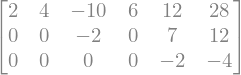

In [50]:
Matrix(A_bar).echelon_form()

Như vậy, ta có $\bar{A}$ tương đương dòng với ma trận bậc thang
$$
R = 
\begin{bmatrix}
\boxed{1} & 2 & -5 & 3 &  6 & 14 \\
0 & 0 & \boxed{1} & 0 & -\frac{7}{2} & -6 \\
0 & 0 &  0 & 0 & \boxed{1} & 2 \\ 
\end{bmatrix}.
$$

Ta thấy hệ này có vô số nghiệm. Giải từ dưới lên bằng phép thế ngược cho các ẩn cơ sở $x_1, x_3, x_5$ và các ẩn tự do $x_2, x_4$

In [80]:
sol = back_substitution(R)

if not sol:
    print("Hệ vô nghiệm")
else:
    myprint(sol, sep=", ")

[-2*x2 - 3*x4 + 7, x2, 1, x4, 2]


Như vậy, hệ có nghiệm tổng quát
$$
\boldsymbol{x} = 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ 
\end{bmatrix} = 
\begin{bmatrix}
7 -2x_2 - 3x_4 \\ x_2 \\ 1 \\ x_4 \\ 2 \\ 
\end{bmatrix} =
\begin{bmatrix}
7 \\ 0 \\ 1 \\ 0 \\ 2 \\ 
\end{bmatrix} +
x_2 \begin{bmatrix}
-2 \\ 1 \\ 0 \\ 0 \\ 0 \\ 
\end{bmatrix} +
x_4 \begin{bmatrix}
-3 \\ 0 \\ 0 \\ 1 \\ 0 \\ 
\end{bmatrix},
x_2, x_4 \in \mathbb{R}.
$$

In [52]:
sympy.linsolve(Matrix(A_bar), [sympy.symbols(f"x_{i}") for i in range(1, 6)])

## Không gian con, cơ sở và số chiều <a class="anchor" id="c6"></a>

### Các khái niệm cơ bản

Cho $V \subset \mathbb{R}^n$, ta nói $V$ là **không gian con** (subspace) của $\mathbb{R}^n$, kí hiệu $V \le \mathbb{R}^n$ nếu:

* $\boldsymbol{0} \in V$,

* Với mọi $\boldsymbol{v}, \boldsymbol{w} \in V$, ta có $\alpha \boldsymbol{v} + \beta \boldsymbol{w} \in V, \forall \alpha, \beta \in \mathbb{R}$.

Cho họ các vector $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k \in \mathbb{R}^n$, tập tất cả các tổ hợp tuyến tính của $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k$ được kí hiệu là $\mathrm{Span}\{\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k\}$, tức là
$$
\mathrm{Span}\{\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k\} = \{\alpha_1 \boldsymbol{v}_1 + \alpha_2 \boldsymbol{v}_2 + ... + \alpha_k \boldsymbol{v}_k: \alpha_1, \alpha_2, ..., \alpha_k \in \mathbb{R}\} \subset \mathbb{R}^n.
$$

***Mệnh đề.*** $\mathrm{Span}\{\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k\} \le \mathbb{R}^n$. Ta còn nói $\mathrm{Span}\{\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k\}$ là không gian con **sinh bởi** (span) $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k$ và $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k$ là một **tập sinh** (generating set) của $\mathrm{Span}\{\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k\}$. 

Cho họ các vector $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k \in \mathbb{R}^n$, ta nói họ là **phụ thuộc tuyến tính** (linearly dependent) nếu có vector nào đó là một tổ hợp tuyến tính của các vector còn lại; ngược lại, họ được nói là **độc lập tuyến tính** (linearly independent).

***Mệnh đề.*** Họ $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k \in \mathbb{R}^n$ độc lập tuyến tính khi và chỉ khi hệ PTTT thuần nhất $A\boldsymbol{x} = \boldsymbol{0}$ có nghiệm duy nhất (là nghiệm tầm thường $\boldsymbol{0} \in \mathbb{R}^k$) với $A \in \mathbb{R}^{n \times k}$ là ma trận gồm các cột $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k$.

Cho không gian con $V \le \mathbb{R}^n$ và họ hữu hạn $B \subset \mathbb{R}^n$, ta nói $B$ là một **cơ sở** (basic) của $V$ nếu $B$ là một tập sinh của $V$ và $B$ độc lập tuyến tính. Khi đó, $|B|$ (số lượng vector trong $B$) được gọi là **số chiều** (dimension) của $V$, kí hiệu $\mathrm{dim}(V)$.

Các ví dụ về không gian con:

> $\{0\}$ là không gian con tầm thường của $\mathbb{R}^n$ với số chiều là 0 và cơ sở là $\{\}$.

> $\mathbb{R}^n$ là không gian con tầm thường của $\mathbb{R}^n$ với số chiều là $n$. Tập các vector $\boldsymbol{e}_1 = (1, 0, ..., 0), \boldsymbol{e}_2 = (0, 1, 0, ..., 0), ..., \boldsymbol{e}_n = (0, ..., 0, 1)$ là một cơ sở của $\mathbb{R}^n$, gọi là **cơ sở chính tắc** (standard basic).

> Cho ma trận $A \in \mathbb{R}^{m \times n}$, ta nói:
>   * **Không gian dòng** (row space) của $A$, kí hiệu $\mathrm{Row}(A)$, là không gian con sinh bởi các dòng của $A$
>   $$\mathrm{Row}(A) = \mathrm{Span}\{\boldsymbol{a}_{1,}, \boldsymbol{a}_{2,}, ..., \boldsymbol{a}_{m,}\} \le \mathbb{R}^{n},$$
>   * **Không gian cột** (column space) của $A$, kí hiệu $\mathrm{Col}(A)$, là không gian con sinh bởi các cột của $A$
>   $$\mathrm{Col}(A) = \mathrm{Span}\{\boldsymbol{a}_{,1}, \boldsymbol{a}_{,2}, ..., \boldsymbol{a}_{,n}\} \le \mathbb{R}^{m},$$
>   * **Không gian nghiệm** (null space) của $A$, kí hiệu $\mathrm{Null}(A)$, là tập tất cả các nghiệm của hệ PTTT thuần nhất $A\boldsymbol{x} = \boldsymbol{0}$.  
>     ***Mệnh đề.*** $\mathrm{Null}(A) \le \mathbb{R}^{n}$.

> ***Mệnh đề.*** $\mathrm{Col}(A) = \mathrm{Row}(A^T)$.

> ***Mệnh đề.*** $\mathrm{dim}(\mathrm{Row}(A)) = \mathrm{dim}(\mathrm{Col}(A))$. Số chiều này còn được gọi là **hạng** (rank) của ma trận, kí hiệu, $\mathrm{rank}(A)$.

> ***Mệnh đề.*** $\mathrm{rank}(A) + \mathrm{dim}(\mathrm{Null}(A)) = n$.

> ***Mệnh đề.*** Nếu $A, B$ tương đương dòng thì $\mathrm{Row}(A) = \mathrm{Row}(B)$. Nếu $E$ là ma trận bậc thang (theo dòng) thì các dòng khác $\boldsymbol{0}$ của $E$ lập thành một cơ sở của $\mathrm{Row}(E)$.

### Thư viện hỗ trợ

* **NumPy**, **SciPy**: 

  * hàm [`numpy.linalg.matrix_rank`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html) tìm hạng của ma trận.
  
  * hàm [`scipy.linalg.null_space`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.null_space.html) tìm không gian nghiệm của ma trận (trả về một cơ sở của không gian nghiệm).

* **SymPy**: 
  - phương thức [`rank`](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixReductions.rank) tìm hạng của ma trận.
  
  - Các phương thức [`rowspace`](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixSubspaces.rowspace), [`columnspace`](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixSubspaces.columnspace), [`nullspace`](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixSubspaces.nullspace) tìm các không gian dòng, cột, nghiệm của ma trận (trả về một cơ sở của không gian tương ứng).

### Ví dụ

#### Ví dụ 1

Trong $\mathbb{R}^3$, cho $\boldsymbol{v}_1 = (1, 2, -3), \boldsymbol{v}_2 = (2, 5, -1), \boldsymbol{v}_3 = (1, 1, -8)$. Kiểm tra $B = \{\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3\}$ có là một cơ sở của $\mathbb{R}^3$.

Nếu $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3$ độc lập tuyến tính thì $B$ là một cơ sở của $\mathbb{R}^3$ do $\mathrm{dim}(\mathbb{R}^3) = 3$.

Đặt $A$ là ma trận gồm các cột $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3$, ta có $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3$ độc lập tuyến tính khi và chỉ khi hệ PTTT $A\boldsymbol{x} = \boldsymbol{0}$ có nghiệm duy nhất.

In [53]:
v1, v2, v3 = [1, 2, -3], [2, 5, -1], [1, 1, -8]

A = transpose([v1, v2, v3])

myprint(Gauss_elimination(to_fraction(A)))

[[1 2  1]
 [0 1 -1]
 [0 0  0]]


Từ ma trận bậc thang trên, ta thấy hệ có vô số nghiệm.

[[-0.90453403]
 [ 0.30151134]
 [ 0.30151134]]


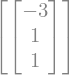

In [54]:
print(scipy.linalg.null_space(A))

Matrix(A).nullspace()

Như vậy $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3$ không độc lập tuyến tính nên $B$ không là cơ sở của $\mathbb{R}^3$.

Ta cũng có thể dùng hạng của ma trận để kiểm tra

In [55]:
print(np.linalg.matrix_rank(A))

print(Matrix(A).rank())

2
2


Vì $\mathrm{rank}(A) = 2 < 3$ nên $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3$ không độc lập tuyến tính.

#### Ví dụ 2

Trong $\mathbb{R}^4$, cho $\boldsymbol{v}_1 = (1, 2, 1, 1), \boldsymbol{v}_2 = (3, 6, 5, 7), \boldsymbol{v}_3 = (4, 8, 6, 8), \boldsymbol{v}_4 = (8, 16, 12, 20)$. Tìm một cơ sở và số chiều của không gian con sinh bởi $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3, \boldsymbol{v}_4$.

Đặt $A$ là ma trận gồm các dòng $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3, \boldsymbol{v}_4$, ta có $\mathrm{Row}(A) = \mathrm{Span}\{\boldsymbol{v}_{1}, \boldsymbol{v}_{2}, \boldsymbol{v}_{3}, \boldsymbol{v}_{4}\}$.

In [56]:
v1, v2, v3, v4 = [1, 2, 1, 1], [3, 6, 5, 7], [4, 8, 6, 8], [8, 16, 12, 20]
A = [v1, v2, v3, v4]

myprint(Gauss_elimination(to_fraction(A)))

[[1 2 1 1]
 [0 0 1 2]
 [0 0 0 1]
 [0 0 0 0]]


Như vậy $\mathrm{Span}\{\boldsymbol{v}_{1}, \boldsymbol{v}_{2}, \boldsymbol{v}_{3}, \boldsymbol{v}_{4}\}$ có số chiều là 3 và có một cơ sở là
$$
\{(1, 2, 1, 1), (0, 0, 1, 2), (0, 0, 0, 1)\}.
$$

In [57]:
Matrix(A).rowspace()

#### Ví dụ 3

Tìm không gian nghiệm của hệ PTTT thuần nhất sau
$$
\begin{matrix}
   x_1 & + & 2x_2 & - &  3x_3 & + &  5x_4 & = & 0\\
   x_1 & + & 3x_2 & - & 13x_3 & + & 22x_4 & = & 0\\ 
  3x_1 & + & 5x_2 & + &   x_3 & - &  2x_4 & = & 0\\
  2x_1 & + & 3x_2 & + &  4x_3 & - &  7x_4 & = & 0\\
\end{matrix}.
$$

Không gian nghiệm của hệ PTTT thuần nhất trên chính là không gian nghiệm của ma trận hệ số
$$
A = 
\begin{bmatrix}
1 & 2 &  -3 & 5\\
1 & 3 & -13 & 22\\
3 & 5 &   1 & -2\\
2 & 3 &   4 & -7\\
\end{bmatrix}.
$$

In [58]:
A = [[1, 2,  -3,  5],
     [1, 3, -13, 22],
     [3, 5,   1, -2],
     [2, 3,   4, -7]]

A_bar = augmented_matrix(A, create_zero_vector(4))
myprint(back_substitution(Gauss_elimination(to_fraction(A_bar))), ", ")

[-17*x3 + 29*x4, 10*x3 - 17*x4, x3, x4]


Như vậy, hệ có nghiệm tổng quát
$$
\boldsymbol{x} = 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{bmatrix} =
\begin{bmatrix}
-17x_3 + 29x_4 \\ 10x_3 - 17x_4 \\ x_3 \\ x_4 
\end{bmatrix} =
x_3 \begin{bmatrix}
-17 \\ 10 \\ 1 \\ 0 \\ 
\end{bmatrix} +
x_4 \begin{bmatrix}
29 \\ -17 \\ 0 \\ 1 \\ 
\end{bmatrix},
x_3, x_4 \in \mathbb{R}.
$$

Như vậy $\mathrm{Null}(A)$ có số chiều là 2 và có một cơ sở là
$$
\{(-17, 10, 1, 0), (29, -17, 0, 1)\}
$$

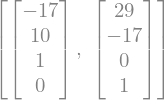

In [59]:
Matrix(A).nullspace()

## Trực giao hóa với thuật giải Gram-Schmidt <a class="anchor" id="c7"></a>

### Các khái niệm cơ bản

Ta nói họ (hệ, tập) các vector $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k \in \mathbb{R}^n$ là **trực giao** (orthogonal) nếu chúng đôi một trực giao, tức là $\langle \boldsymbol{v}_i, \boldsymbol{v}_j \rangle = 0, \forall i \ne j.$

In [60]:
def orthogonal_set(vs):
    return all(is_orthogonal(vs[i], vs[j]) for i in range(len(vs)) for j in range(len(vs)) if i != j)

Ta nói họ (hệ, tập) các vector $\boldsymbol{q_1}, \boldsymbol{q}_2, ..., \boldsymbol{q}_k \in \mathbb{R}^n$ là **trực chuẩn** (orthonormal) nếu chúng là họ trực giao các vector đơn vị.

In [61]:
def orthonormal_set(vs):
    return orthogonal_set(vs) and all(is_unit_vector(vi) for vi in vs)

### Thuật giải Gram-Schmidt

Cho tập các vector $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k \in \mathbb{R}^n$, **thuật giải Gram-Schmidt** (Gram-Schmidt algorithm) tìm họ trực giao (hoặc trực chuẩn) các vector $\boldsymbol{q}_1, \boldsymbol{q}_2, ..., \boldsymbol{q}_r \in \mathbb{R}^n$ là một cơ sở của $\mathrm{Span}\{\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k\}$. Thuật giải gồm các bước:

> **Bước 1.** Tạo tập $Q = \{\}$ chứa cơ sở kết quả.

> **Bước 2.** Đặt $i = 1$ và lặp lại các Bước 3-4 cho đến khi $i > k$.

> **Bước 3.** Tính 
> $$
\boldsymbol{q}_i = \boldsymbol{v}_i - \sum_{\boldsymbol{q}_j \in Q} \frac{\langle \boldsymbol{v}_i, \boldsymbol{q}_j \rangle}{\| \boldsymbol{q}_j \|^2}\boldsymbol{q}_j
$$

> **Bước 4.** Nếu $\boldsymbol{q}_i \neq 0$ thì thêm $\boldsymbol{q}_i$ vào $Q$. Tăng $i$ thêm $1$.

> **Bước 5.** **Chuẩn hóa** (normalizing) nếu cần họ trực chuẩn
> $$
\boldsymbol{q}_i = \frac{\boldsymbol{q}_i}{\| \boldsymbol{q}_i \|}, \forall \boldsymbol{q}_i \in Q
$$

> **Bước 6.** Trả về $Q$.

In [62]:
def Gram_Schmidt(vs, normalizing=False):
    # Bước 1
    Q = []
    
    # Bước 2
    for vi in vs:
        # Bước 3
        qi = vi
        for qj in Q:
            qi = sub_vector(qi, mul_scalar_vector(Fraction(calc_inner_product(vi, qj), calc_inner_product(qj, qj)), qj))
        
        # Bước 4
        if not is_zero_vector(qi):
            Q.append(qi)
    
    # Bước 5
    if normalizing:
        Q = [mul_scalar_vector(1/norm(qi), qi) for qi in Q]
    
    return Q

### Thư viện hỗ trợ

* **SciPy**: dùng hàm [`scipy.linalg.orth`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.orth.html) để tìm cơ sở trực chuẩn của không gian cột của một ma trận. Tuy nhiên, hàm này dùng một thuật giải khác (mà ta sẽ học sau).

* **SymPy**: dùng hàm [`sympy.Matrix.orthogonalize`](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixSubspaces.orthogonalize) để thực hiện giải thuật Gram-Schmidt.

### Ví dụ

#### Ví dụ 1

Dùng thuật giải Gram-Schmidt trực giao hóa họ 3 vector sau và cho biết họ có độc lập tuyến tính hay không?
$$
\boldsymbol{v}_1 = (-1, 1, -1, 1), \boldsymbol{v}_2 = (-1, 3, -1, 3), \boldsymbol{v}_3 = (0, 2, 0, 2)
$$

In [63]:
v1 = [-1, 1, -1, 1]
v2 = [-1, 3, -1, 3]
v3 = [0, 2, 0, 2]
vs = [v1, v2, v3]

Q = Gram_Schmidt(vs)
myprint(Q)

if len(Q) < len(vs):
    print("Hệ không độc lập tuyến tính!")

[[-1 1 -1 1]
 [ 1 1  1 1]]
Hệ không độc lập tuyến tính!


In [64]:
Q1 = Gram_Schmidt(vs, normalizing=True)
Q2 = scipy.linalg.orth(np.array(vs).T).T

print('Trực giao sử dụng Gram_Schmidt')
myprint(Q1)

print('\nTrực giao sử dụng scipy.linalg.orth')
print(Q2)

print('\nKiểm tra trực chuẩn')
print(orthonormal_set(Q1), orthonormal_set(Q2))

Trực giao sử dụng Gram_Schmidt
[[-1/2 1/2 -1/2 1/2]
 [ 1/2 1/2  1/2 1/2]]

Trực giao sử dụng scipy.linalg.orth
[[-0.20490834  0.67676626 -0.20490834  0.67676626]
 [ 0.67676626  0.20490834  0.67676626  0.20490834]]

Kiểm tra trực chuẩn
True True


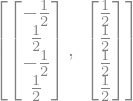

In [65]:
Matrix.orthogonalize(Matrix(v1), Matrix(v2), Matrix(v3), normalize=True)

Như vậy, họ $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3$ không độc lập tuyến tính và một cơ sở trực giao cho $\mathrm{Span}\{\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3\} \le \mathbb{R}^4$ là
$$
\boldsymbol{q}_1 = (-1, 1, -1, 1), \boldsymbol{q}_2 = (1, 1, 1, 1)
$$

#### Ví dụ 2

Dùng thuật giải Gram-Schmidt trực chuẩn hóa họ 3 vector sau
$$
\boldsymbol{v}_1 = (1, 1, 1), \boldsymbol{v}_2 = (0, 1, 1), \boldsymbol{v}_3 = (0, 0, 1)
$$

In [66]:
v1 = [1, 1, 1]
v2 = [0, 1, 1]
v3 = [0, 0, 1]

myprint(Gram_Schmidt([v1, v2, v3]))
myprint(Gram_Schmidt([v1, v2, v3], normalizing=True))

[[   1    1   1]
 [-2/3  1/3 1/3]
 [   0 -1/2 1/2]]
[[ sqrt(3)/3  sqrt(3)/3 sqrt(3)/3]
 [-sqrt(6)/3  sqrt(6)/6 sqrt(6)/6]
 [         0 -sqrt(2)/2 sqrt(2)/2]]


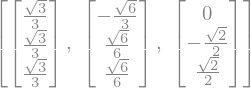

In [67]:
Matrix.orthogonalize(Matrix(v1), Matrix(v2), Matrix(v3), normalize=True)

Như vậy, họ $\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3$ độc lập tuyến tính và một cơ sở trực chuẩn cho $\mathrm{Span}\{\boldsymbol{v}_1, \boldsymbol{v}_2, \boldsymbol{v}_3\} = \mathbb{R}^3$ là
$$
\boldsymbol{q}_1 = \frac{1}{\sqrt{3}}(1, 1, 1), \boldsymbol{q}_2 = \frac{1}{\sqrt{6}}(-2, 1, 1), \boldsymbol{q}_3 = \frac{1}{\sqrt{2}}(0, -1, 1)
$$

## Bài tập <a class="anchor" id="c8"></a>

### Bài tập tự rèn luyện

Cho $\boldsymbol{v}, \boldsymbol{w} \in \mathbb{R}^n$ khác $\boldsymbol{0}$, ta định nghĩa **góc** (angle) giữa $\boldsymbol{v}, \boldsymbol{w}$ là
$$
\mathrm{angle}(\boldsymbol{v}, \boldsymbol{w}) = \arccos \left( \frac{\langle \boldsymbol{v}, \boldsymbol{w} \rangle}{\| \boldsymbol{v} \|\| \boldsymbol{w} \|} \right).
$$

Viết hàm tính góc giữa $\boldsymbol{v}, \boldsymbol{w}$ được cho

In [68]:
def angle(v, w):
    return math.degrees(math.acos(calc_inner_product(v, w)/(norm(v)*norm(w))))

Viết hàm tính tổ hợp tuyến tính của các vector $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k \in \mathbb{R}^n$ theo các hệ số $\alpha_1, \alpha_2, ..., \alpha_k \in \mathbb{R}$.

In [69]:
def linear_combination(vs, alphas):
    "vs là danh sách các vector và alphas là danh sách các hệ số tương ứng"
    return sum(mul_scalar_vector(alphas[i], vs[i]) for i in range(len(vs)))

Từ đó viết hàm tính vector trung bình của $k$ vector $\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k \in \mathbb{R}^n$
$$
\mathrm{mean}\{\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_k\} = \frac{\sum_{i=1}^k \boldsymbol{v}_i}{k}.
$$

In [70]:
def mean(vs):
    pass # TODO
    return mul_scalar_vector(1/len(vs), sum(vs))

Cho $\boldsymbol{v} = (v_1, v_2, .., v_n) \in \mathbb{R}^n$, ta nói vector tích lũy của $\boldsymbol{v}$, kí hiệu $\mathrm{acc}(\boldsymbol{v})$, là vector $\boldsymbol{w} = (w_1, w_2, ..., w_n) \in \mathbb{R}^n$ thỏa
$$
w_i = \sum_{j=1}^i v_j, \forall i = 1, 2, ..., n
$$
và nói vector sai phân của $\boldsymbol{v}$, kí hiệu $\mathrm{diff}(\boldsymbol{v})$, là vector $\boldsymbol{w} = (w_1, w_2, ..., w_n) \in \mathbb{R}^n$ thỏa $w_1 = v_1$ và $w_i = v_{i} - v_{i - 1}, \forall i = 2, ..., n$.

Viết các hàm tính $\mathrm{acc}(\boldsymbol{v}), \mathrm{diff}(\boldsymbol{v})$ từ $\boldsymbol{v}$ và từ đó nhận xét quan hệ giữa các vector này.

In [71]:
def acc(v):
    pass # TODO

def diff(v):
    pass # TODO

Cho $V = \{\boldsymbol{v}_1, \boldsymbol{v}_2, ..., \boldsymbol{v}_m\} \subset \mathbb{R}^n$ và $\boldsymbol{v} \in \mathbb{R}^n$, ta nói **láng giềng gần nhất** (nearest neighbor) của $\boldsymbol{v}$ trong $S$ là $\boldsymbol{w} \in S$ sao cho
$$
\| \boldsymbol{v} - \boldsymbol{w} \| \le \| \boldsymbol{v} - \boldsymbol{v}_i \|, \forall i = 1, 2, ..., m.
$$

Viết hàm tìm láng giềng gần nhất của của $\boldsymbol{v}$ trong $S$ được cho.

In [72]:
def nearest_neighbor(v, S):
    pass # TODO

Mở rộng khái niệm láng giềng gần nhất thành $k$ láng giềng gần nhất và viết hàm thực hiện.

In [73]:
def kNN(v, S, k=1):
    pass # TODO

### Bài tập ứng dụng: Cân bằng phản ứng hóa học

**Công thức hóa học** (chemical formula) của các phân tử hóa học có thể được mô tả trong Python bằng một danh sách ([`list`](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists)) các bộ ([`tuple`](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences)). Chẳng hạn, công thức hóa học của nước $\text{H}_2\text{O}$ có thể được mô tả bởi danh sách `[("H", 2), ("O", 1)]`.

Viết hàm trả về chuỗi biểu diễn LaTeX của công thức hóa học.

In [74]:
def chemical_formula(mol):
    pass # TODO

In [75]:
from IPython.display import Latex

mol = chemical_formula([("H", 2), ("O", 1)])
# sẽ được như
mol = r"\text{H}_2\text{O}"

print(mol)
Latex("$" + mol + "$")

\text{H}_2\text{O}


<IPython.core.display.Latex object>

Mở rộng hàm trên để cho phép công thức có chứa các nhóm nguyên tử. Chẳng hạn, công thức hóa học của nhôm sunfat $\text{Al}_2(\text{S}\text{O}_4)_3$ có thể được mô tả bởi danh sách `[("Al", 2), ([("S", 1), ("O", 4)], 3)]`.

In [76]:
mol = chemical_formula([("Al", 2), ([("S", 1), ("O", 4)], 3)])
# sẽ được như
mol = r"\text{Al}_2(\text{S}\text{O}_4)_3"

print(mol)
Latex("$" + mol + "$")

\text{Al}_2(\text{S}\text{O}_4)_3


<IPython.core.display.Latex object>

Một **phản ứng hóa học** (chemical reaction) có thể được mô tả bởi 2 danh sách: danh sách các **phân tử tham gia phản ứng** (reactant) và danh sách các **phân tử sản phẩm** (product). Viết hàm cân bằng phản ứng hóa học và trả về chuỗi biểu diễn LaTeX của **phương trình hóa học** (chemical equation) đã cân bằng.

In [77]:
def balance_chemical_equation(lhs, rhs):
    "lhs là danh sách các phân tử tham gia phản ứng, rhs là danh sách các phân tử sản phẩm"
    pass # TODO

In [78]:
H2O = [("H", 2), ("O", 1)]
H2 = [("H", 2)]
O2 = [("O", 2)]

equation = balance_chemical_equation([H2O], [H2, O2])
# sẽ được như
equation = r"2\text{H}_2\text{O} \to 2\text{H}_2 + \text{O}_2"

print(equation)
Latex("$$" + equation + "$$")

2\text{H}_2\text{O} \to 2\text{H}_2 + \text{O}_2


<IPython.core.display.Latex object>

In [79]:
Al_OH3 = [("Al", 1), ([("O", 1), ("H", 1)], 3)]
H2_SO4 = [("H", 2), ([("S", 1), ("O", 4)], 1)]
Al2_SO43 = [("Al", 2), ([("S", 1), ("O", 4)], 3)]
H2O = [("H", 2), ("O", 1)]

equation = balance_chemical_equation([Al_OH3, H2_SO4], [Al2_SO43, H2O])
# sẽ được như
equation = r"2\text{Al}(\text{O}\text{H})_3 + 3\text{H}_2\text{S}\text{O}_4 \to \text{Al}_2(\text{S}\text{O}_4)_3 + 6\text{H}_2\text{O}"

print(equation)
Latex("$$" + equation + "$$")

2\text{Al}(\text{O}\text{H})_3 + 3\text{H}_2\text{S}\text{O}_4 \to \text{Al}_2(\text{S}\text{O}_4)_3 + 6\text{H}_2\text{O}


<IPython.core.display.Latex object>